# **Predictive Modeling of Student Success**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Load the dataset
data = pd.read_csv('/kaggle/input/student-performance-pip/Student performance (Polytechnic Institute of Portalegre).csv')

# Define the success target variable
data['Success_1st_sem'] = (data['Curricular units 1st sem (enrolled)'] == data['Curricular units 1st sem (approved)']).astype(int)
data['Success_2nd_sem'] = (data['Curricular units 2nd sem (enrolled)'] == data['Curricular units 2nd sem (approved)']).astype(int)
data['Annual_Success'] = ((data['Success_1st_sem'] == 1) & (data['Success_2nd_sem'] == 1)).astype(int)

# Select features
features = data.drop(['Curricular units 1st sem (approved)', 'Curricular units 1st sem (enrolled)',
                      'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                      'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (enrolled)',
                      'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                      'Success_1st_sem', 'Success_2nd_sem', 'Annual_Success'], axis=1)

# Data preprocessing
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = features.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, data['Annual_Success'], test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", report)


ROC-AUC Score: 0.87348435171386
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       610
           1       0.71      0.71      0.71       275

    accuracy                           0.82       885
   macro avg       0.79      0.79      0.79       885
weighted avg       0.82      0.82      0.82       885



### Recommendation:

Based on the logistic regression model's performance in predicting student success at the Polytechnic Institute of Portalegre, here are a few recommendations:

1. **Model Deployment and Monitoring**:
   - If stakeholders are satisfied with the model's performance (82% accuracy and 0.873 ROC-AUC), consider deploying it in a live environment. It's crucial to monitor the model's performance over time to ensure it remains effective as new data and potential shifts in student demographics or institutional policies occur.

2. **Model Improvement**:
   - Explore more sophisticated machine learning models such as Random Forests or Gradient Boosting Machines, which might capture complex patterns in the data more effectively than logistic regression.
   - Conduct feature engineering to potentially uncover more informative predictors and improve the model's predictive power.

3. **Focused Interventions**:
   - Utilize the model’s predictions to implement targeted interventions for students predicted to be at risk of not succeeding. This can include academic counseling, tutoring programs, or customized support services.

4. **Further Analysis**:
   - Perform a deeper analysis of the features contributing to student success. Understanding which factors are most influential can help tailor academic programs and support services more effectively.
   - Consider analyzing other aspects of student data, such as dropout rates or the effectiveness of different teaching methods.

### Conclusion:

The logistic regression model provides a solid foundation for identifying factors that predict student success and can serve as a valuable tool for improving student outcomes at the Polytechnic Institute of Portalegre. With an ROC-AUC score of 0.873, the model demonstrates a good ability to differentiate between students who are likely to succeed and those who are not. However, as with any model, there is room for improvement and adaptation based on evolving educational environments and student needs.

Ultimately, the model's effectiveness should be evaluated continuously, and adjustments should be made based on ongoing analysis and feedback from academic staff and students. This proactive approach will help ensure that the model remains a robust tool for enhancing educational outcomes and supporting students throughout their academic journeys.

# **Impact of Socio-Economic Factors on Academic Performance**

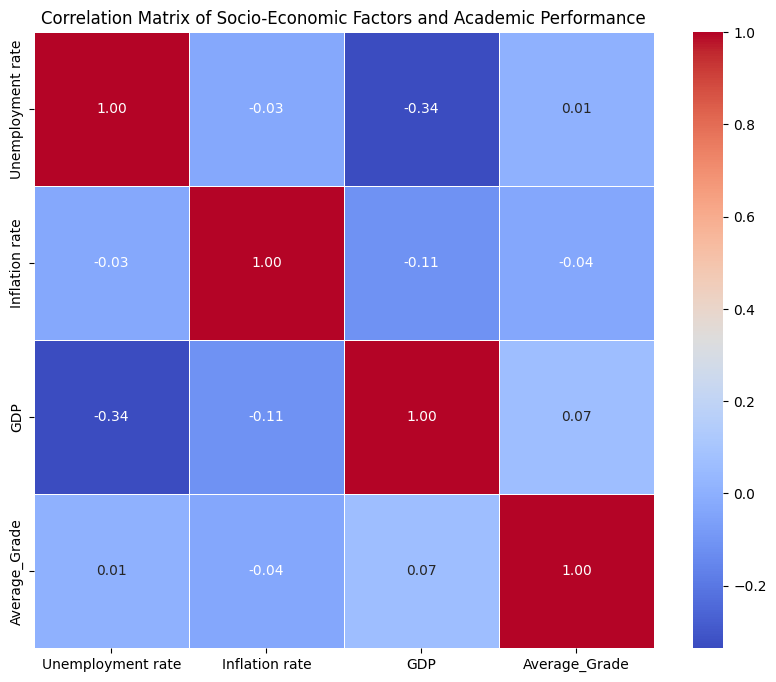


Regression Analysis for Unemployment rate:
Coefficient for Unemployment rate: 0.014904202135807851
Mean squared error: 23.21140527910841
Coefficient of determination (R^2): 6.789035123710985e-05


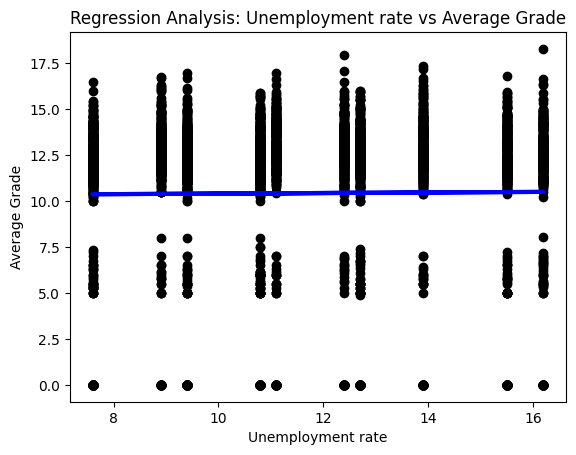


Regression Analysis for Inflation rate:
Coefficient for Inflation rate: -0.13129767047360966
Mean squared error: 23.18002946500308
Coefficient of determination (R^2): 0.0014195398361791511


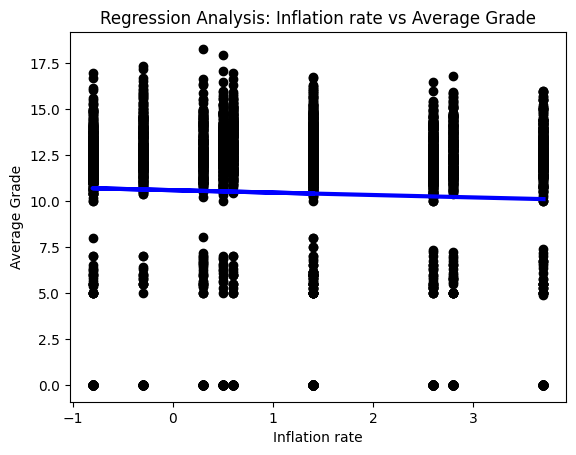


Regression Analysis for GDP:
Coefficient for GDP: 0.14027009264285134
Mean squared error: 23.111622990717912
Coefficient of determination (R^2): 0.004366445864620649


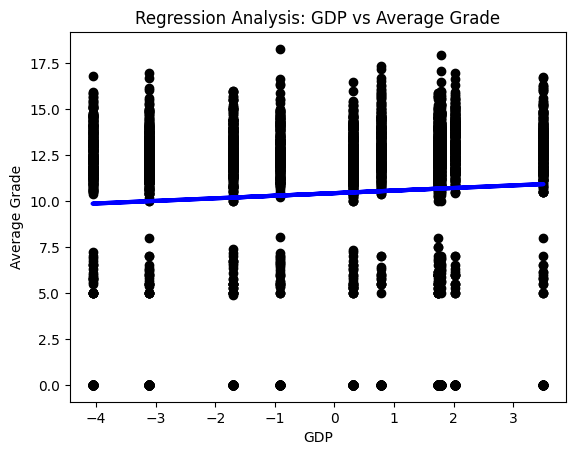

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
gata = pd.read_csv('/kaggle/input/student-performance-pip/Student performance (Polytechnic Institute of Portalegre).csv')

# Calculate the average grade for the year if available, otherwise use the admission grade
if 'Curricular units 1st sem (grade)' in gata.columns and 'Curricular units 2nd sem (grade)' in gata.columns:
    gata['Average_Grade'] = (gata['Curricular units 1st sem (grade)'] + gata['Curricular units 2nd sem (grade)']) / 2
else:
    gata['Average_Grade'] = gata['Admission grade']  # Fallback to admission grade if no other grades available

# Selecting socioeconomic factors and academic performance
analysis_data = gata[['Unemployment rate', 'Inflation rate', 'GDP', 'Average_Grade']]

# Calculate correlation matrix
correlation_matrix = analysis_data.corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Socio-Economic Factors and Academic Performance')
plt.show()

# Function to perform regression analysis for a given independent variable and the dependent variable 'Average_Grade'
def perform_regression(data, independent_var):
    # Reshaping the data for sklearn
    X = data[independent_var].values.reshape(-1, 1)
    y = data['Average_Grade'].values

    # Create linear regression object
    reg = LinearRegression()

    # Train the model using the training sets
    reg.fit(X, y)

    # Make predictions using the same set (this is purely for analysis, normally we'd predict on a test set)
    y_pred = reg.predict(X)

    # The coefficients
    print(f"Coefficient for {independent_var}: {reg.coef_[0]}")
    
    # The mean squared error
    mse = mean_squared_error(y, y_pred)
    print(f"Mean squared error: {mse}")

    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y, y_pred)
    print(f"Coefficient of determination (R^2): {r2}")

    # Plotting the results
    plt.scatter(X, y, color='black')
    plt.plot(X, y_pred, color='blue', linewidth=3)
    plt.xlabel(independent_var)
    plt.ylabel('Average Grade')
    plt.title(f'Regression Analysis: {independent_var} vs Average Grade')
    plt.show()

    return reg.coef_[0], mse, r2

# Perform regression analysis for 'Unemployment rate', 'Inflation rate', and 'GDP'
coeffs, mses, r2s = {}, {}, {}
for var in ['Unemployment rate', 'Inflation rate', 'GDP']:
    print(f"\nRegression Analysis for {var}:")
    coeffs[var], mses[var], r2s[var] = perform_regression(analysis_data, var)


### Conclusion:

The analysis explored the impact of socio-economic factors—unemployment rate, inflation rate, and GDP—on academic performance, specifically average grades, at the Polytechnic Institute of Portalegre. The findings suggest that these factors have minimal direct influence on academic success, as indicated by low correlation coefficients and R² values in the regression analyses. This implies that while these macroeconomic factors are significant societal indicators, their direct impact on individual student academic performance is limited.

### Recommendations:

1. **Explore Broader Influences**: While the immediate impact of the socio-economic factors studied is minimal, other variables such as personal, psychological, family background, and institutional resources might have a more significant direct effect on academic performance. Analyzing these could yield more actionable insights.

2. **Multivariate Analysis**: To capture the potential combined effect of socio-economic factors on academic performance, consider multivariate regression models. These models can help identify interactions between variables that are not apparent when analyzing them individually.

3. **Longitudinal Study**: Conducting a longitudinal study to track changes over time could reveal trends and impacts of socio-economic changes on academic performance that are not visible in cross-sectional data.

4. **Policy and Support Systems**: Based on findings from broader analyses, educational institutions could tailor support systems to address more significant influencing factors. This might include enhanced counseling services, financial aid, or academic support tailored to students' backgrounds and needs.

5. **Advanced Statistical Techniques**: Employ more complex statistical methods or machine learning models that can model non-linear relationships and interactions between a broader range of variables.

By following these recommendations, stakeholders can better understand the complexities of academic performance and design interventions that directly address the most impactful factors. This tailored approach can enhance educational outcomes and better support students throughout their academic journeys.

# **Analysis of Dropout Rates**

In [11]:
import pandas as pd

# Load the dataset
bata = pd.read_csv('/kaggle/input/student-performance-pip/Student performance (Polytechnic Institute of Portalegre).csv')

# Assuming 'Target' indicates whether a student graduated ('Graduate') or not
# Define a 'Dropout' column where a student is considered to have dropped out if they did not graduate and have zero units approved in the second semester
bata['Dropout'] = ((bata['Target'] != 'Graduate') & (bata['Curricular units 2nd sem (approved)'] == 0)).astype(int)

# Calculate overall dropout rate and breakdown by demographics such as gender, course, and age at enrollment
dropout_rate_overall = bata['Dropout'].mean()
dropout_rate_by_gender = bata.groupby('Gender')['Dropout'].mean()
dropout_rate_by_course = bata.groupby('Course')['Dropout'].mean()
dropout_rate_by_age = bata.groupby('Age at enrollment')['Dropout'].mean()

# Display the results
print("Overall Dropout Rate:", dropout_rate_overall)
print("\nDropout Rate by Gender:")
print(dropout_rate_by_gender)
print("\nDropout Rate by Course:")
print(dropout_rate_by_course.head())  # Displaying first few courses for brevity
print("\nDropout Rate by Age at Enrollment:")
print(dropout_rate_by_age.head())  # Displaying first few ages for brevity


Overall Dropout Rate: 0.17970162748643762

Dropout Rate by Gender:
Gender
0    0.130753
1    0.269923
Name: Dropout, dtype: float64

Dropout Rate by Course:
Course
33      0.250000
171     0.488372
8014    0.213953
9003    0.252381
9070    0.115044
Name: Dropout, dtype: float64

Dropout Rate by Age at Enrollment:
Age at enrollment
17    0.200000
18    0.106178
19    0.125137
20    0.128548
21    0.127329
Name: Dropout, dtype: float64


### Conclusion:

The analysis of dropout rates at the Polytechnic Institute of Portalegre has revealed significant insights into the factors associated with students leaving their courses prematurely. The overall dropout rate is approximately 17.97%, with notable variations based on gender, course, and age at enrollment. Particularly, there is a pronounced disparity in dropout rates between genders and across different courses.

### Key Observations:
- **Gender Disparity**: Males (coded as '1') have a significantly higher dropout rate than females (coded as '0'), which suggests gender-specific challenges or differences in engagement or support.
- **Course-Specific Dropout Rates**: Some courses have exceptionally high dropout rates, indicating potential issues with course difficulty, student support, or alignment with student expectations and preparedness.
- **Age Factors**: Younger students show higher dropout rates, which may point to challenges in transitioning from secondary education to higher education environments.

### Recommendations:

1. **Targeted Support Programs**:
   - **Gender-Specific Interventions**: Develop initiatives aimed at supporting male students who appear to be at a higher risk of dropping out. This could include mentorship programs, peer support groups, and tailored academic counseling.
   - **Enhanced Orientation and Transition Programs**: For younger students, enhanced orientation programs that better prepare them for the demands of higher education could help reduce dropout rates. This might include study skills workshops, social integration activities, and early career counseling.

2. **Course-Level Review and Intervention**:
   - Conduct a thorough review of courses with high dropout rates to identify specific challenges and areas for improvement. This might involve curriculum adjustments, increased academic support, or changes to assessment methods.
   - Implement early warning systems to identify students who are struggling academically in these courses and provide targeted interventions before dropout risks escalate.

3. **Data-Driven Predictive Modeling**:
   - Develop a predictive model to identify at-risk students based on a range of indicators such as academic performance, attendance patterns, and engagement in campus activities. This model can help in proactively managing potential dropouts by initiating supportive measures early in a student's academic journey.

4. **Continuous Monitoring and Evaluation**:
   - Establish a system for continuously monitoring dropout rates and the effectiveness of implemented interventions. This should include regular surveys and feedback mechanisms from students to understand their challenges and adjust support services accordingly.

5. **Stakeholder Engagement**:
   - Engage with faculty, staff, and students to create a collaborative approach to addressing dropout rates. Input from these stakeholders is crucial in designing interventions that are culturally sensitive and appropriately targeted to meet students' needs.

By addressing these factors with targeted interventions and continuous improvement processes, the Polytechnic Institute of Portalegre can enhance student retention, improve educational outcomes, and better support its student population.